# ¡Hola, Jefferson!  

Mi nombre es Carlos Ortiz, soy code reviewer de TripleTen y voy a revisar el proyecto que acabas de desarrollar.

Cuando vea un error la primera vez, lo señalaré. Deberás encontrarlo y arreglarlo. La intención es que te prepares para un espacio real de trabajo. En un trabajo, el líder de tu equipo hará lo mismo. Si no puedes solucionar el error, te daré más información en la próxima ocasión. 

Encontrarás mis comentarios más abajo - **por favor, no los muevas, no los modifiques ni los borres**.

¿Cómo lo voy a hacer? Voy a leer detenidamente cada una de las implementaciones que has llevado a cabo para cumplir con lo solicitado. Verás los comentarios de esta forma:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si todo está perfecto.
</div>


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>


<div class="alert alert-block alert-danger">
    
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
    
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>


Puedes responderme de esta forma: 


<div class="alert alert-block alert-info">
<b>Respuesta del estudiante</b> <a class="tocSkip"></a>
</div>
¡Empecemos!

# Proyecto 8: Compañía Móvil Megaline 
Este proyecto busca desarrollar y evaluar modelos de aprendizaje automático para predecir qué tipo de plan de teléfono móvil un cliente preferiría, normal o ultra, basándose en su comportamiento de uso. Se utilizarán tres modelos: Árbol de Decisión, Bosque Aleatorio y Regresión Logística. El objetivo es proporcionar a la compañía de telecomunicaciones información útil para mejorar la satisfacción del cliente y optimizar los recursos empresariales.

## Análisis Exploratorio de Datos

**Importar Librerias**

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

**Importar Datasets**

In [5]:
df = pd.read_csv("/datasets/users_behavior.csv")

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con la importación de datos y de librerías.
</div>


In [6]:
# Explorar los primeros registros del dataset
print(df.head())

   calls  minutes  messages   mb_used  is_ultra
0   40.0   311.90      83.0  19915.42         0
1   85.0   516.75      56.0  22696.96         0
2   77.0   467.66      86.0  21060.45         0
3  106.0   745.53      81.0   8437.39         1
4   66.0   418.74       1.0  14502.75         0


In [9]:
# Información sobre el dataset
print(df.info())
print()
df.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB
None



,calls,minutes,messages,mb_used,is_ultra
790,42.0,285.74,1.0,16807.61,0
1418,82.0,589.95,9.0,11666.32,0
618,65.0,490.26,76.0,30307.39,1
1109,69.0,479.79,0.0,17559.43,0
285,16.0,93.79,103.0,19428.22,1


In [8]:
# Contar el número de clientes en el plan Ultra y en el plan Smart
total_ultra = df[df['is_ultra'] == 1].shape[0]
total_smart = df[df['is_ultra'] == 0].shape[0]

print("Total de clientes en el plan Ultra:", total_ultra)
print("Total de clientes en el plan Smart:", total_smart)

Total de clientes en el plan Ultra: 985
Total de clientes en el plan Smart: 2229


In [6]:
# Resumen estadístico de los datos numéricos
df.describe()

,calls,minutes,messages,mb_used,is_ultra
count,3214.000000,3214.000000,3214.000000,3214.000000,3214.000000
mean,63.038892,438.208787,38.281269,17207.673836,0.306472
std,33.236368,234.569872,36.148326,7570.968246,0.461100
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,40.000000,274.575000,9.000000,12491.902500,0.000000
50%,62.000000,430.600000,30.000000,16943.235000,0.000000
75%,82.000000,571.927500,57.000000,21424.700000,1.000000
max,244.000000,1632.060000,224.000000,49745.730000,1.000000


Tipos de datos: Todas las variables son numéricas, siendo cuatro de tipo float64 (llamadas, minutos, mensajes y mb_usados) y una de tipo int64 (is_ultra, que indica si el usuario utiliza el plan Ultra o no).

## Gráficos

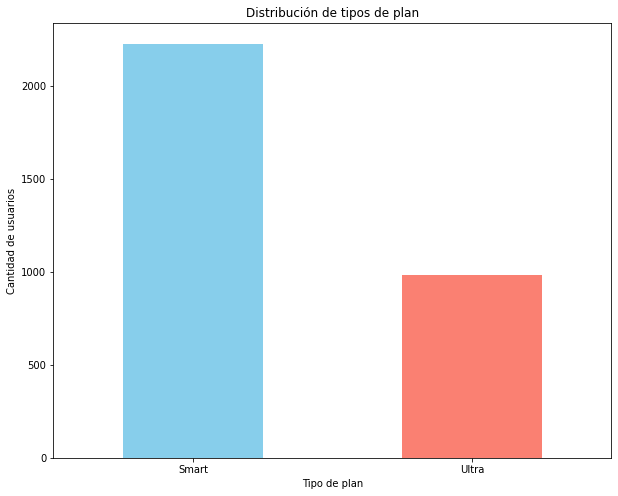

Total de clientes en el plan Smart: 2229
Total de clientes en el plan Ultra: 985


In [7]:
# Gráfico de barras para la variable 'is_ultra'
plt.figure(figsize=(10, 8))
df['is_ultra'].value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Distribución de tipos de plan')
plt.xlabel('Tipo de plan')
plt.ylabel('Cantidad de usuarios')
plt.xticks([0, 1], ['Smart', 'Ultra'], rotation=0)
plt.show()
# Contar el número de clientes en el plan Ultra y en el plan Smart
total_ultra = df[df['is_ultra'] == 1].shape[0]
total_smart = df[df['is_ultra'] == 0].shape[0]

print("Total de clientes en el plan Smart:", total_smart)
print("Total de clientes en el plan Ultra:", total_ultra)

Existen más clientes en el plan Smart que en el plan Ultra, como se observa en el gráfico de barras. Esto sugiere que el plan Smart es más popular entre los usuarios en comparación con el plan Ultra.

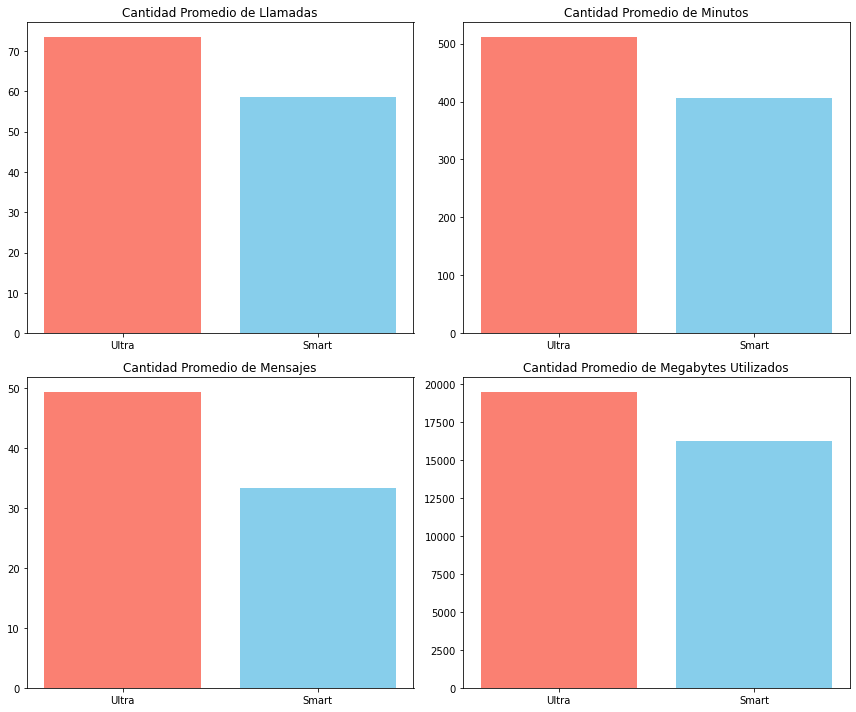

In [8]:
# Calcular las estadísticas para el plan Ultra
ultra_calls_mean = df[df['is_ultra'] == 1]['calls'].mean()
ultra_minutes_mean = df[df['is_ultra'] == 1]['minutes'].mean()
ultra_messages_mean = df[df['is_ultra'] == 1]['messages'].mean()
ultra_mb_used_mean = df[df['is_ultra'] == 1]['mb_used'].mean()

# Calcular las estadísticas para el plan Smart
smart_calls_mean = df[df['is_ultra'] == 0]['calls'].mean()
smart_minutes_mean = df[df['is_ultra'] == 0]['minutes'].mean()
smart_messages_mean = df[df['is_ultra'] == 0]['messages'].mean()
smart_mb_used_mean = df[df['is_ultra'] == 0]['mb_used'].mean()

# Colores para cada gráfico
colors = ['salmon', 'skyblue']

# Crear el gráfico de barras
plt.figure(figsize=(12, 10))

# Gráfico de barras para la cantidad promedio de llamadas
plt.subplot(2, 2, 1)
plt.bar(['Ultra', 'Smart'], [ultra_calls_mean, smart_calls_mean], color=colors[0:2])
plt.title('Cantidad Promedio de Llamadas')

# Gráfico de barras para la cantidad promedio de minutos
plt.subplot(2, 2, 2)
plt.bar(['Ultra', 'Smart'], [ultra_minutes_mean, smart_minutes_mean], color=colors[0:2])
plt.title('Cantidad Promedio de Minutos')

# Gráfico de barras para la cantidad promedio de mensajes
plt.subplot(2, 2, 3)
plt.bar(['Ultra', 'Smart'], [ultra_messages_mean, smart_messages_mean], color=colors[0:2])
plt.title('Cantidad Promedio de Mensajes')

# Gráfico de barras para la cantidad promedio de megabytes utilizados
plt.subplot(2, 2, 4)
plt.bar(['Ultra', 'Smart'], [ultra_mb_used_mean, smart_mb_used_mean], color=colors[0:2])
plt.title('Cantidad Promedio de Megabytes Utilizados')

# Ajustar el espacio entre los gráficos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

En términos de promedio, los usuarios del plan Ultra tienden a realizar más llamadas, consumir más minutos, enviar más mensajes y utilizar más megabytes de datos en comparación con los usuarios del plan Smart. Esto indica que los usuarios del plan Ultra son más activos en términos de consumo de servicios de telefonía móvil que los usuarios del plan Smart.

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Puedes complementar esta descripción inicial con una exploración gráfica.
</div>


**Segmentación de los datos**

In [9]:
# Separar las características (features) y el objetivo (target)
features = df.drop('is_ultra', axis=1)
target = df['is_ultra']

# Dividir los datos en entrenamiento (60%), validación (20%) y prueba (20%)
train_features, test_features, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=54321)
train_features, val_features, train_target, val_target = train_test_split(train_features, train_target, test_size=0.25, random_state=54321)

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo con esta separación de datos.
</div>


## Modelos

### Arbol de Decisión

In [10]:
# Definir los parámetros a buscar
param_grid = {
    'max_depth': range(1, 200)
}

# Crear el modelo de árbol de decisión
dt_model = DecisionTreeClassifier(random_state=54321)

# Instanciar GridSearchCV
grid_search_dt = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Entrenar el modelo
grid_search_dt.fit(train_features, train_target)

# Obtener los mejores hiperparámetros y el mejor score
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

In [11]:
# Crear el modelo final con los mejores hiperparámetros
best_dt_model = DecisionTreeClassifier(max_depth=best_params_dt['max_depth'], random_state=54321)

best_dt_model.fit(train_features, train_target)

# Evaluar el modelo en el conjunto de prueba
test_predictions_dt = best_dt_model.predict(test_features)
test_accuracy_dt = accuracy_score(test_target, test_predictions_dt)
test_precision_dt = precision_score(test_target, test_predictions_dt)
test_recall_dt = recall_score(test_target, test_predictions_dt)
test_f1_dt = f1_score(test_target, test_predictions_dt)
test_conf_matrix_dt = confusion_matrix(test_target, test_predictions_dt)

# Crear DataFrame con los resultados del modelo
decision_tree_df = pd.DataFrame(data=[['Decision Tree', test_accuracy_dt, test_precision_dt, test_recall_dt, test_f1_dt]], 
                                columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Mostrar resultados
display(decision_tree_df)
print('Best parameters for Decision Tree:', best_params_dt)
print('Best score for Decision Tree:', best_score_dt)
print('Confusion Matrix for Decision Tree:')
print(test_conf_matrix_dt)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.769829,0.765625,0.453704,0.569767


Best parameters for Decision Tree: {'max_depth': 5}
Best score for Decision Tree: 0.7842295573869243
Confusion Matrix for Decision Tree:
[[397  30]
 [118  98]]


El árbol de decisión logra una buena precisión, pero su recall es relativamente bajo, lo que indica que no identifica una parte significativa de los casos positivos. Esto se refleja en su puntuación F1, que, aunque razonable, no es tan alta como se esperaría para un modelo ideal.

### Bosque Aleatorio

In [12]:
# Definir los parámetros a buscar
param_grid = {
    'n_estimators': range(1, 101, 10),
    'max_depth': range(1, 21)
}

# Crear el modelo de Bosque Aleatorio
rf_model = RandomForestClassifier(random_state=42)

# Instanciar GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, scoring='accuracy')

# Entrenar el modelo
grid_search_rf.fit(train_features, train_target)

# Obtener los mejores hiperparámetros y el mejor score
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_          

In [1]:
# Crear el modelo final con los mejores hiperparámetros
best_rf_model = RandomForestClassifier(n_estimators=best_params_rf['n_estimators'], 
                                       max_depth=best_params_rf['max_depth'], 
                                       random_state=42)

best_rf_model.fit(train_features, train_target)

# Evaluar el modelo en el conjunto de prueba
test_predictions_rf = best_rf_model.predict(test_features)
test_accuracy_rf = accuracy_score(test_target, test_predictions_rf)
test_precision_rf = precision_score(test_target, test_predictions_rf)
test_recall_rf = recall_score(test_target, test_predictions_rf)
test_f1_rf = f1_score(test_target, test_predictions_rf)
test_conf_matrix_rf = confusion_matrix(test_target, test_predictions_rf)

# Crear DataFrame con los resultados del modelo
random_forest_df = pd.DataFrame(data=[['Random Forest', test_accuracy_rf, test_precision_rf, test_recall_rf, test_f1_rf]], 
                                columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Mostrar resultados
display(random_forest_df)
print('Best parameters for Random Forest:', best_params_rf)
print('Best score for Random Forest:', best_score_rf)
print('Confusion Matrix for Random Forest:')
print(test_conf_matrix_rf)

NameError: name 'RandomForestClassifier' is not defined

El Bosque Aleatorio muestra un equilibrio mejorado entre precisión y recall en comparación con el Árbol de Decisión. Aunque su precisión es ligeramente más baja, su recall es significativamente mejor, lo que se traduce en una puntuación F1 más alta. Este modelo parece ser una mejora sobre el árbol de decisión en términos de identificación de casos positivos.

### Regresión Logistica

In [14]:
lr_model = LogisticRegression(random_state=54321, solver='liblinear')
lr_model.fit(train_features, train_target)

# Evaluación final del modelo en el conjunto de prueba
test_predictions = lr_model.predict(test_features)
test_accuracy = accuracy_score(test_target, test_predictions)
test_precision = precision_score(test_target, test_predictions)
test_recall = recall_score(test_target, test_predictions)
test_f1 = f1_score(test_target, test_predictions)
test_conf_matrix = confusion_matrix(test_target, test_predictions)

logistic_regression_df = pd.DataFrame(data=[['Logistic Regression', test_accuracy, test_precision, test_recall, test_f1]], columns=['Algorithm', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(logistic_regression_df)
print('Confusion Matrix:')
print(test_conf_matrix)

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.709176,0.837209,0.166667,0.277992


Confusion Matrix:
[[420   7]
 [180  36]]


Aunque la regresión logística muestra una precisión bastante alta, su recall es muy bajo, lo que indica que identifica una pequeña proporción de los casos positivos. Esto se refleja en su puntuación F1, que es relativamente baja. En general, este modelo parece ser menos efectivo en la identificación de casos positivos en comparación con los otros dos modelos.

In [15]:
models_results = pd.concat([decision_tree_df, random_forest_df, logistic_regression_df], ignore_index=True)
models_results

,Algorithm,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.769829,0.765625,0.453704,0.569767
1,Random Forest,0.780715,0.781955,0.481481,0.595989
2,Logistic Regression,0.709176,0.837209,0.166667,0.277992


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
¡Excelente trabajo en esta sección! En el futuro, para poder trabajar con más hiperparámetros y no utilizar bucles, puedes explorar el objeto `GridSearchCV` de `sklearn`.
</div>


## Conclusión

El modelo que tiene el mejor rendimiento es el Bosque Aleatorio (Random Forest). Este modelo tiene una exactitud del 78.07%, una precisión del 78.20%, y un recall del 48.15%. Además, su puntuación F1, que es una medida del equilibrio entre precisión y recall, es del 59.60%.

Aunque la Regresión Logística (Logistic Regression) tiene una precisión ligeramente mayor del 70.92%, su recall es muy bajo, solo del 16.67%, lo que indica que identifica una proporción muy pequeña de los verdaderos casos positivos. Esto se refleja en su puntuación F1, que es considerablemente más baja en comparación con el Bosque Aleatorio, solo del 27.80%.

Por otro lado, aunque el Árbol de Decisión (Decision Tree) tiene una precisión del 76.98%, su recall es del 45.37%, lo que indica que identifica menos casos positivos en comparación con el Bosque Aleatorio. Además, su puntuación F1 es del 56.98%, que es menor que la del Bosque Aleatorio.

En resumen, el Bosque Aleatorio proporciona un mejor equilibrio entre precisión y recall, lo que se refleja en su puntuación F1 más alta, y por lo tanto se considera el mejor modelo para este conjunto de datos y problema en particular.

<div class="alert alert-block alert-danger">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Buen trabajo, Jefferson. Nos quedan algunos elementos por corregir antes de poder aprobar tu proyecto. He dejado comentarios a lo largo del documento para ello.
</div>


<div class="alert alert-block alert-success">
    
# Comentarios generales
<b>Comentario del revisor</b> <a class="tocSkip"></a>
    
Todo corregido. Has aprobado un nuevo proyecto. ¡Felicitaciones!
</div>